In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import re
from pathlib import Path

In [2]:
df = pd.read_csv(r"D:\datasets\VideoGames\all_video_games(cleaned).csv")
df.head()

,Title,Release Date,Developer,Publisher,Genres,Genres Splitted,Product Rating,User Score,User Ratings Count,Platforms Info
0,Ziggurat (2012),2/17/2012,Action Button Entertainment,Freshuu Inc.,Action,['Action'],NaN,6.9,14.0,"[{'Platform': 'iOS (iPhone/iPad)', 'Platform M..."
1,4X4 EVO 2,11/15/2001,Terminal Reality,Gathering,Auto Racing Sim,"['Auto', 'Racing', 'Sim']",Rated E For Everyone,NaN,NaN,"[{'Platform': 'Xbox', 'Platform Metascore': '5..."
2,MotoGP 2 (2001),1/22/2002,Namco,Namco,Auto Racing Sim,"['Auto', 'Racing', 'Sim']",Rated E For Everyone,5.8,NaN,"[{'Platform': 'PlayStation 2', 'Platform Metas..."
3,Gothic 3,11/14/2006,Piranha Bytes,Aspyr,Western RPG,"['Western', 'RPG']",Rated T For Teen,7.5,832.0,"[{'Platform': 'PC', 'Platform Metascore': '63'..."
4,Siege Survival: Gloria Victis,5/18/2021,FishTankStudio,Black Eye Games,RPG,['RPG'],NaN,6.5,10.0,"[{'Platform': 'PC', 'Platform Metascore': '69'..."


In [3]:
df_nulls = df.isnull()
df_nulls.sum()

Title                   21
Release Date            64
Developer              138
Publisher              138
Genres                  21
Genres Splitted         21
Product Rating        3050
User Score            2341
User Ratings Count    2756
Platforms Info           0
dtype: int64

In [4]:
df.duplicated().sum()

20

In [5]:
df = df[df.notnull().all(1)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9085 entries, 3 to 14053
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               9085 non-null   object 
 1   Release Date        9085 non-null   object 
 2   Developer           9085 non-null   object 
 3   Publisher           9085 non-null   object 
 4   Genres              9085 non-null   object 
 5   Genres Splitted     9085 non-null   object 
 6   Product Rating      9085 non-null   object 
 7   User Score          9085 non-null   float64
 8   User Ratings Count  9085 non-null   float64
 9   Platforms Info      9085 non-null   object 
dtypes: float64(2), object(8)
memory usage: 780.7+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df['Release Date']=pd.to_datetime(df['Release Date'])

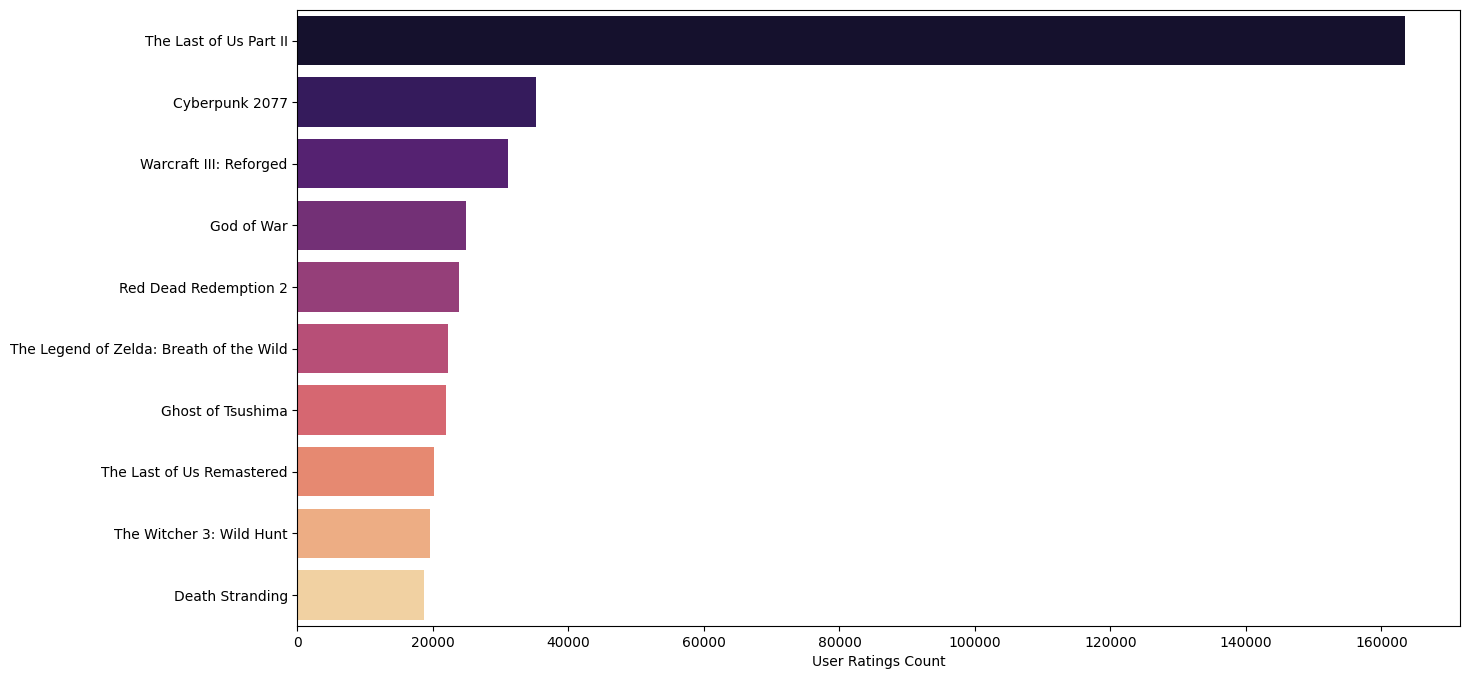

In [8]:
most_popular_games = df.nlargest(10, 'User Ratings Count')

plt.figure(figsize=(15, 8))
sns.barplot(x='User Ratings Count', hue='Title',y='Title', legend=False, data=most_popular_games, palette='magma')
plt.xlabel('User Ratings Count')
plt.ylabel('')
plt.show()

In [9]:
Top_Game_Developers=df['Developer'].value_counts().reset_index().head(15)
Top_Game_Developers.style.hide(axis="index")

Developer,count
Capcom,158
Nintendo,133
Telltale Games,86
Konami,72
Square Enix,71
Omega Force,66
Ubisoft,61
Ubisoft Montreal,58
EA Sports,54
Bandai Namco Games,50


In [10]:
df['Release Year']=df['Release Date'].dt.year

In [11]:
released_games_by_years = df['Release Year'].value_counts().reset_index().sort_values(by='Release Year')
released_games_by_years.style.hide(axis="index").background_gradient(cmap='Blues',subset='count')

Release Year,count
1995,1
1996,10
1997,14
1998,42
1999,44
2000,225
2001,306
2002,338
2003,351
2004,369


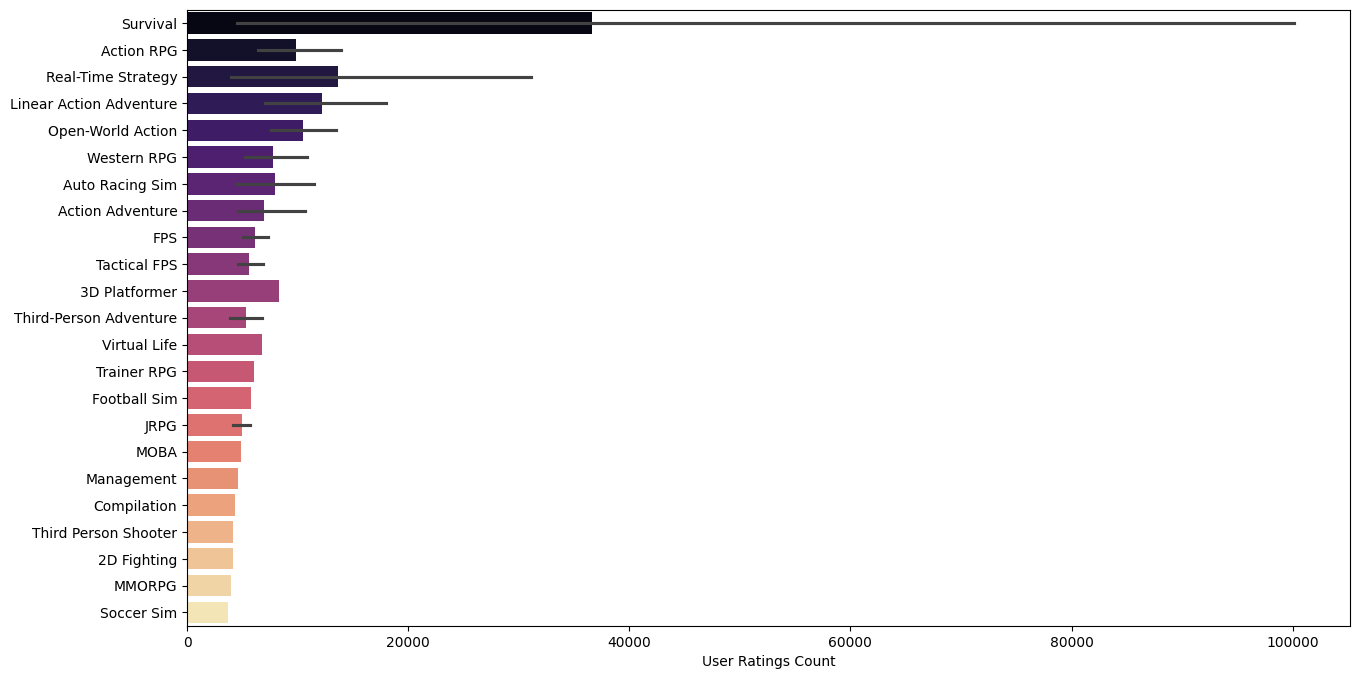

In [12]:
most_rated_genres = df.nlargest(100, 'User Ratings Count')

plt.figure(figsize=(15, 8))
sns.barplot(x='User Ratings Count', hue='Genres',y='Genres', legend=False, data=most_rated_genres, palette='magma')
plt.xlabel('User Ratings Count')
plt.ylabel('')
plt.show()

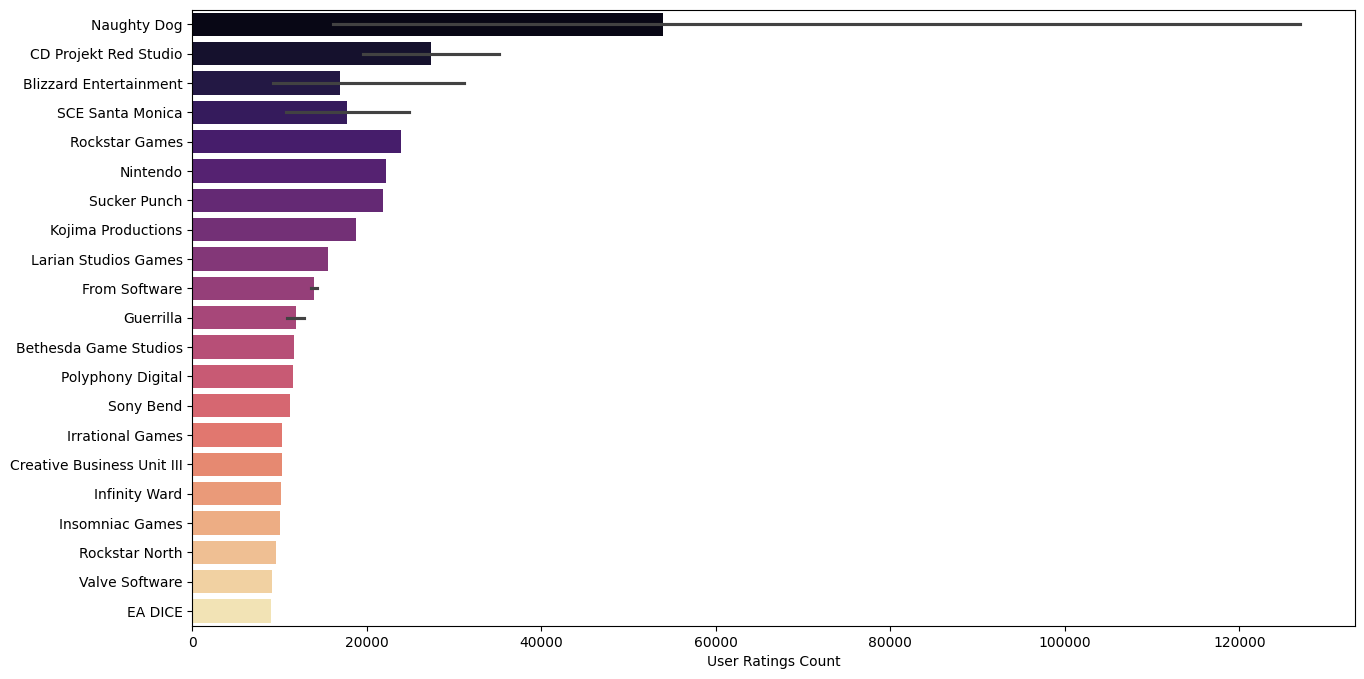

In [13]:
most_rated_developers = df.nlargest(30, 'User Ratings Count')

plt.figure(figsize=(15, 8))
sns.barplot(x='User Ratings Count', hue='Developer',y='Developer', legend=False, data=most_rated_developers, palette='magma')
plt.xlabel('User Ratings Count')
plt.ylabel('')
plt.show()

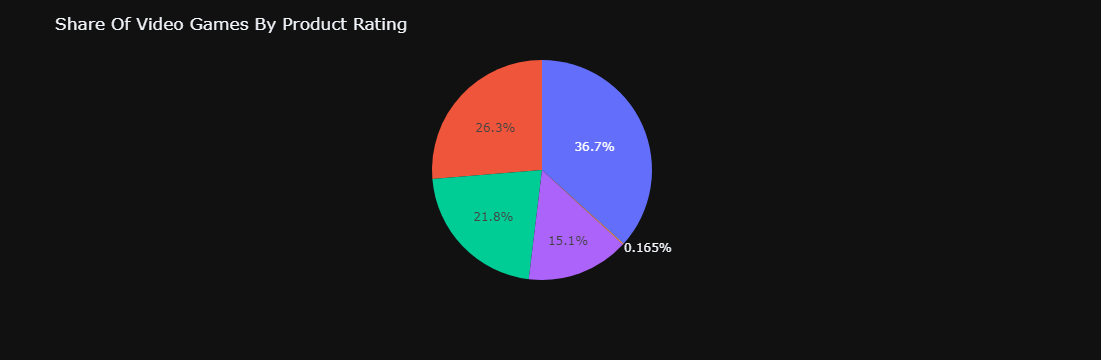

In [28]:
ratings=df['Product Rating'].value_counts()

fig=px.pie(labels=ratings.index,values=ratings.values,hover_name=ratings.index)
fig.update_layout(template='plotly_dark')
fig.update_layout(title=dict(text='Share Of Video Games By Product Rating'))

In [ ]:
# Platforms compare

In [29]:
# Filtering by platform
df_filtered_PC = df[df['Platforms Info'].apply(lambda x: 'PC' in str(x))]
df_filtered_PS4 = df[df['Platforms Info'].apply(lambda x: 'PS4' in str(x))]

most_rated_pc = df_filtered_PC.nlargest(30, 'User Ratings Count')
most_rated_ps = df_filtered_PS.nlargest(30, 'User Ratings Count')

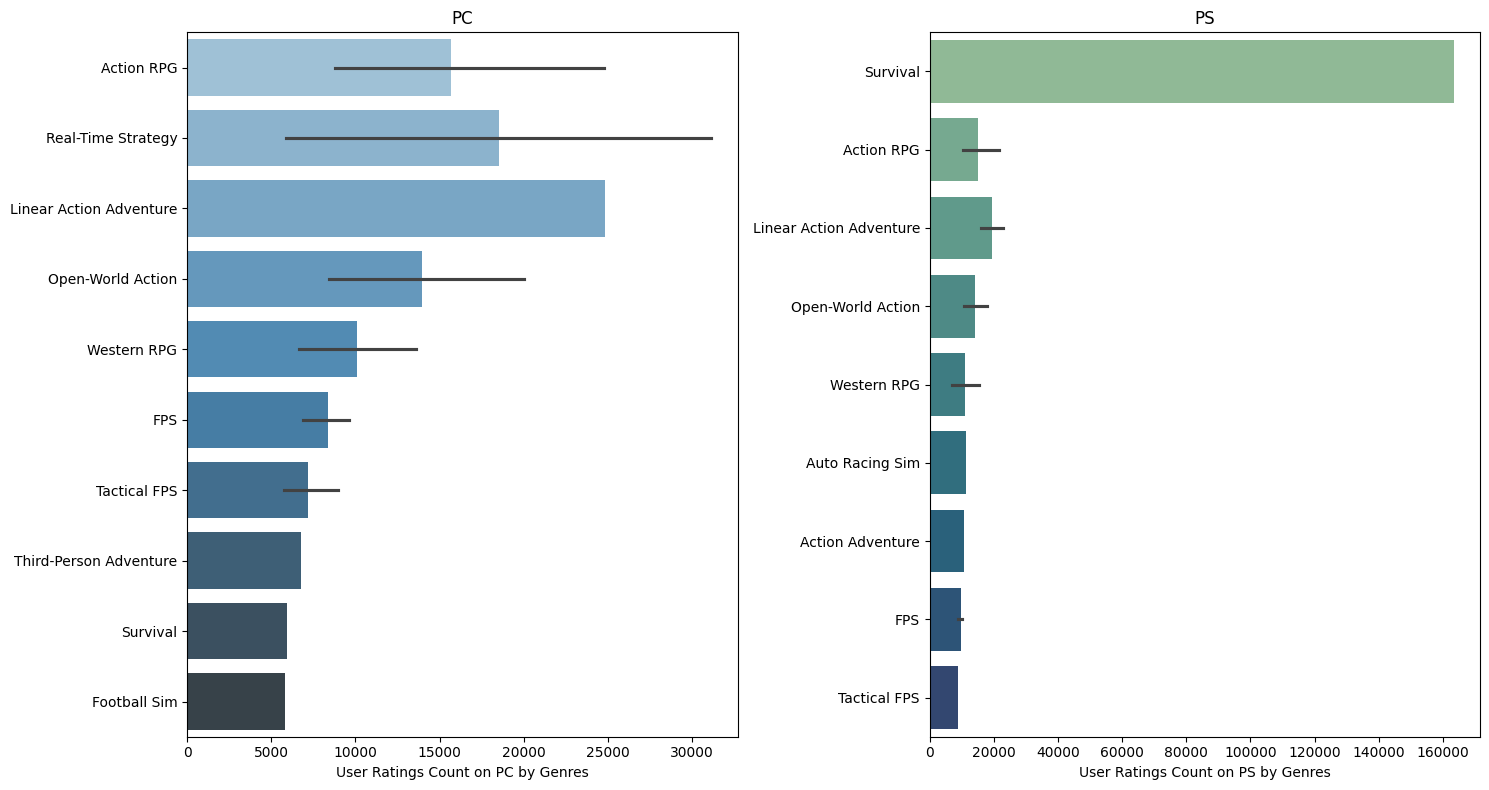

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))



# Graphic for PC
sns.barplot(x='User Ratings Count', hue='Genres', y='Genres', legend=False, data=most_rated_pc, palette='Blues_d', ax=ax1)
ax1.set_xlabel('User Ratings Count on PC by Genres')
ax1.set_ylabel('')
ax1.set_title('PC')

# Graphic for PS
sns.barplot(x='User Ratings Count', hue='Genres', y='Genres', legend=False, data=most_rated_ps, palette='crest', ax=ax2)
ax2.set_xlabel('User Ratings Count on PS by Genres')
ax2.set_ylabel('')
ax2.set_title('PS')

plt.tight_layout()
plt.show()

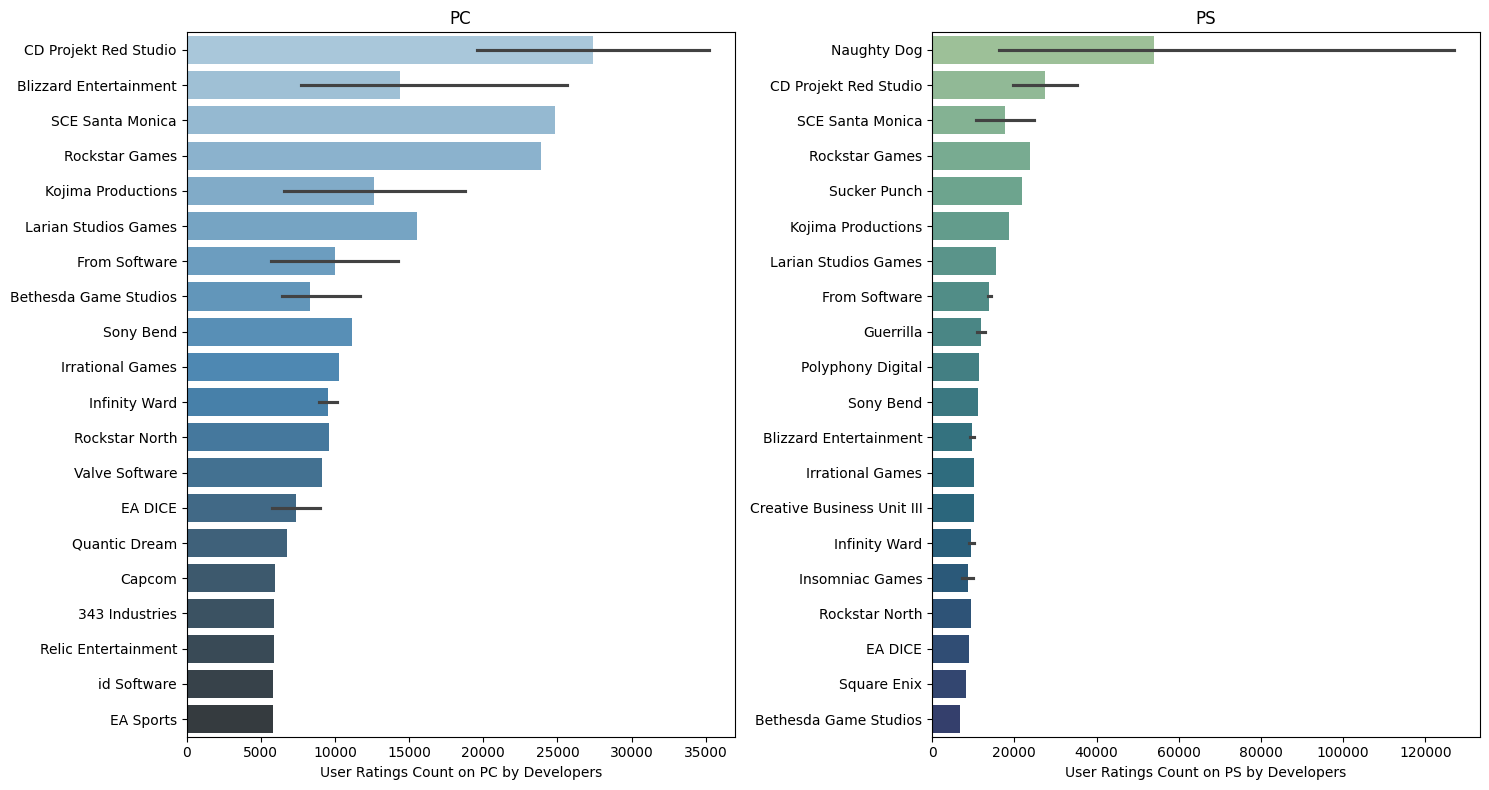

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

# Graphic for PC
sns.barplot(x='User Ratings Count', hue='Developer', y='Developer', legend=False, data=most_rated_pc, palette='Blues_d', ax=ax1)
ax1.set_xlabel('User Ratings Count on PC by Developers')
ax1.set_ylabel('')
ax1.set_title('PC')

# Graphic for PS
sns.barplot(x='User Ratings Count', hue='Developer', y='Developer', legend=False, data=most_rated_ps, palette='crest', ax=ax2)
ax2.set_xlabel('User Ratings Count on PS by Developers')
ax2.set_ylabel('')
ax2.set_title('PS')

plt.tight_layout()
plt.show()